# Contents
### Import libraries and data
### Explore data visually
### Prepare data
### Reshaping variables
### Creating train and test sets
### Predictive scatterplot (Regression)
### Findings

## Import libraries and data

In [48]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from scipy import stats
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [49]:
%matplotlib inline

In [50]:
path = r'C:\Users\Andrew\Desktop\Data project'

In [51]:
citi22 = pd.read_pickle(os.path.join(path, '02 data', 'clean', 'citi22.pkl'))

In [52]:
citi22.head()

,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_latitude,start_longitude,end_latitude,...,member_type,start hour,start day,weekday,month,TripMins,trip_mins,start_station_frequency,end_station_frequency,member
0,electric_bike,2022-01-26 18:50:39,2022-01-26 18:51:53,12 St & Sinatra Dr N,HB201,12 St & Sinatra Dr N,HB201,40.750604,-74.024020,40.750604,...,1,18,26,2,1,0 days 00:01:14,1.23,17060,17518,1
1,classic_bike,2022-01-28 13:14:07,2022-01-28 13:20:23,Essex Light Rail,JC038,Essex Light Rail,JC038,40.712774,-74.036486,40.712774,...,1,13,28,4,1,0 days 00:06:16,6.27,5834,5989,1
2,classic_bike,2022-01-10 19:55:13,2022-01-10 20:00:37,Essex Light Rail,JC038,Essex Light Rail,JC038,40.712774,-74.036486,40.712774,...,1,19,10,0,1,0 days 00:05:24,5.40,5834,5989,1
3,electric_bike,2022-01-26 07:54:57,2022-01-26 07:55:22,12 St & Sinatra Dr N,HB201,12 St & Sinatra Dr N,HB201,40.750604,-74.024020,40.750604,...,1,7,26,2,1,0 days 00:00:25,0.42,17060,17518,1
4,electric_bike,2022-01-13 18:44:46,2022-01-13 18:45:43,12 St & Sinatra Dr N,HB201,12 St & Sinatra Dr N,HB201,40.750604,-74.024020,40.750604,...,1,18,13,3,1,0 days 00:00:57,0.95,17060,17518,1


## Explore data visually

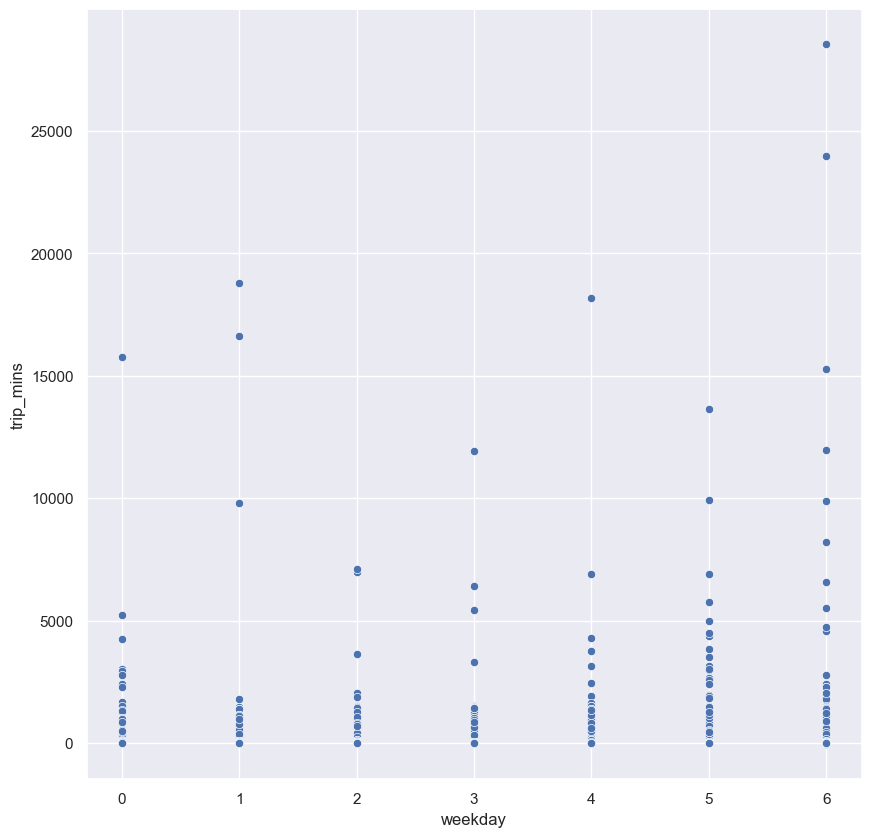

In [53]:
sns.set(rc={"figure.figsize":(10, 10)})
citi22_scatter_plot = sns.scatterplot(x = 'weekday', y = 'trip_mins', data = citi22)
plt.show()

## Preparing data

### creating a smaller sample for the month of january

In [54]:
citi_jan22 = citi22[citi22.month == 1]

In [55]:
citi_jan22.head()

,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_latitude,start_longitude,end_latitude,...,member_type,start hour,start day,weekday,month,TripMins,trip_mins,start_station_frequency,end_station_frequency,member
0,electric_bike,2022-01-26 18:50:39,2022-01-26 18:51:53,12 St & Sinatra Dr N,HB201,12 St & Sinatra Dr N,HB201,40.750604,-74.024020,40.750604,...,1,18,26,2,1,0 days 00:01:14,1.23,17060,17518,1
1,classic_bike,2022-01-28 13:14:07,2022-01-28 13:20:23,Essex Light Rail,JC038,Essex Light Rail,JC038,40.712774,-74.036486,40.712774,...,1,13,28,4,1,0 days 00:06:16,6.27,5834,5989,1
2,classic_bike,2022-01-10 19:55:13,2022-01-10 20:00:37,Essex Light Rail,JC038,Essex Light Rail,JC038,40.712774,-74.036486,40.712774,...,1,19,10,0,1,0 days 00:05:24,5.40,5834,5989,1
3,electric_bike,2022-01-26 07:54:57,2022-01-26 07:55:22,12 St & Sinatra Dr N,HB201,12 St & Sinatra Dr N,HB201,40.750604,-74.024020,40.750604,...,1,7,26,2,1,0 days 00:00:25,0.42,17060,17518,1
4,electric_bike,2022-01-13 18:44:46,2022-01-13 18:45:43,12 St & Sinatra Dr N,HB201,12 St & Sinatra Dr N,HB201,40.750604,-74.024020,40.750604,...,1,18,13,3,1,0 days 00:00:57,0.95,17060,17518,1


In [56]:
citi_jan22.shape

(26359, 21)

### creating exclusion flag for outliers

In [57]:
citi_jan22.loc[citi_jan22['trip_mins'] > 1200, 'outliers'] = 'excluded'
citi_jan22.loc[(citi_jan22['trip_mins'] <= 1200) & (citi_jan22['trip_mins'] >= 50) , 'outliers'] = 'included'
citi_jan22.loc[citi_jan22['trip_mins'] < 50, 'outliers'] = 'excluded'

C:\Users\Andrew\AppData\Local\Temp\ipykernel_14420\2626305595.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  citi_jan22.loc[citi_jan22['trip_mins'] > 1200, 'outliers'] = 'excluded'


### Excluding outliers

In [58]:
jan_no_outliers = citi_jan22[citi_jan22.outliers == 'included']

In [59]:
citi22.shape

(892281, 21)

In [60]:
jan_no_outliers.shape

(353, 22)

In [61]:
jan_no_outliers.head()

,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_latitude,start_longitude,end_latitude,...,start hour,start day,weekday,month,TripMins,trip_mins,start_station_frequency,end_station_frequency,member,outliers
6,classic_bike,2022-01-06 13:25:34,2022-01-06 14:22:48,12 St & Sinatra Dr N,HB201,12 St & Sinatra Dr N,HB201,40.750604,-74.024020,40.750604,...,13,6,3,1,0 days 00:57:14,57.23,17060,17518,0,included
7,classic_bike,2022-01-16 16:41:23,2022-01-16 17:56:50,12 St & Sinatra Dr N,HB201,12 St & Sinatra Dr N,HB201,40.750604,-74.024020,40.750604,...,16,16,6,1,0 days 01:15:27,75.45,17060,17518,1,included
36,classic_bike,2022-01-02 16:05:12,2022-01-02 17:14:04,Essex Light Rail,JC038,Essex Light Rail,JC038,40.712774,-74.036486,40.712774,...,16,2,6,1,0 days 01:08:52,68.87,5834,5989,1,included
40,classic_bike,2022-01-14 10:40:55,2022-01-14 11:35:50,12 St & Sinatra Dr N,HB201,12 St & Sinatra Dr N,HB201,40.750604,-74.024020,40.750604,...,10,14,4,1,0 days 00:54:55,54.92,17060,17518,1,included
64,classic_bike,2022-01-02 16:05:45,2022-01-02 17:14:11,Essex Light Rail,JC038,Essex Light Rail,JC038,40.712774,-74.036486,40.712774,...,16,2,6,1,0 days 01:08:26,68.43,5834,5989,1,included


### Initial plot

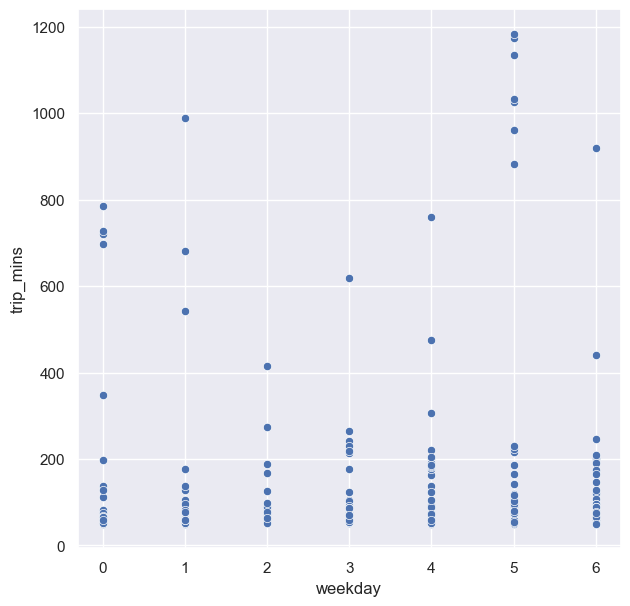

In [62]:
sns.set(rc={"figure.figsize":(7, 7)})
citi22_scatter_plot = sns.scatterplot(x = 'weekday', y = 'trip_mins', data = jan_no_outliers)
plt.show()

In [63]:
citi22_scatter_plot = citi22_scatter_plot.figure
citi22_scatter_plot.savefig(os.path.join(path, '04 Analysis', 'trip_day.png'))

## Hypothesis: The longest trips occur on the weekend

## Respahing variables

In [64]:
x = jan_no_outliers['weekday'].values.reshape(-1,1)
y = jan_no_outliers['trip_mins'].values.reshape(-1,1)

In [65]:
x

array([[3],
       [6],
       [6],
       [4],
       [6],
       [3],
       [2],
       [6],
       [6],
       [1],
       [4],
       [5],
       [6],
       [2],
       [6],
       [0],
       [3],
       [3],
       [6],
       [6],
       [6],
       [2],
       [2],
       [0],
       [4],
       [1],
       [1],
       [1],
       [0],
       [0],
       [3],
       [3],
       [6],
       [3],
       [6],
       [6],
       [6],
       [6],
       [3],
       [0],
       [3],
       [3],
       [5],
       [6],
       [6],
       [1],
       [2],
       [6],
       [6],
       [6],
       [5],
       [5],
       [2],
       [5],
       [6],
       [5],
       [3],
       [3],
       [5],
       [2],
       [6],
       [4],
       [1],
       [0],
       [1],
       [0],
       [2],
       [4],
       [2],
       [4],
       [4],
       [2],
       [2],
       [3],
       [3],
       [1],
       [2],
       [4],
       [3],
       [2],
       [2],
       [5],
       [0],
    

In [66]:
y

array([[  57.23],
       [  75.45],
       [  68.87],
       [  54.92],
       [  68.43],
       [  59.25],
       [  83.37],
       [  81.62],
       [  54.32],
       [  73.17],
       [  76.88],
       [  96.65],
       [ 118.95],
       [  53.32],
       [  52.63],
       [  62.82],
       [  78.88],
       [  79.17],
       [  50.67],
       [  84.75],
       [  82.32],
       [  68.9 ],
       [  59.35],
       [  63.07],
       [  71.7 ],
       [  68.73],
       [  67.1 ],
       [  65.63],
       [  81.87],
       [  62.08],
       [  79.92],
       [  84.52],
       [  60.83],
       [  90.95],
       [ 439.75],
       [ 246.93],
       [  64.83],
       [  65.02],
       [  62.27],
       [  70.42],
       [ 215.9 ],
       [  84.75],
       [  54.68],
       [ 119.72],
       [  55.  ],
       [  60.82],
       [  58.32],
       [  83.98],
       [ 121.58],
       [ 101.2 ],
       [  54.73],
       [  56.43],
       [  91.1 ],
       [ 230.53],
       [  65.45],
       [11

## Creating train and test sets

In [67]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [68]:
regression = LinearRegression()

In [69]:
regression.fit(X_train, y_train)

LinearRegression()

In [70]:
y_predicted = regression.predict(X_test) 

## Predictive scatterplot (Regression)

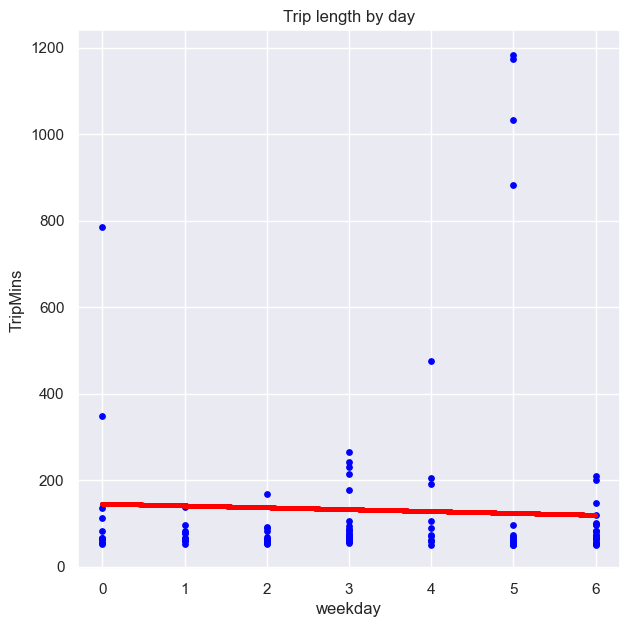

In [71]:
#Creating a plot that shows the regression line from the model on the test set.
plot_test = plt
plot_test.scatter(X_test, y_test, color='blue', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Trip length by day')
plot_test.xlabel('weekday')
plot_test.ylabel('TripMins')
plot_test.show()

In [76]:
plot_test.savefig(os.path.join(path, '04 Analysis', 'regression.png'))

AttributeError: 'function' object has no attribute 'savefig'

In [ ]:
plot_test.savefig(os.path.join(path, '04 Analysis', 'regression.png'))

## Findings

### This does not seem to be a correct fit for the data given.

In [129]:
rmse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted)

In [130]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-4.31513443]]
Mean squared error:  43688.6581445848
R2 score:  -0.010403100932187659


### Predicted vs actual

In [131]:
data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,83.37,135.765009
1,265.13,131.449875
2,72.70,118.504471
3,50.42,127.134740
4,71.07,131.449875
5,72.40,122.819606
6,60.53,122.819606
7,52.55,118.504471
8,65.02,118.504471
9,55.52,135.765009


### I am unaware of any bias, but I can confidently say by looking at the predicted vs actual values that the model did not perform well in the slightest. with some points being off by over 50%.